In [10]:
%pylab inline
import yaml
import h5py
import yaml
from scipy.interpolate import interp2d,RectBivariateSpline
import luxeics
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("Comparison_Sigma_5_.pdf")

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Comparison between New and Old Program

In [12]:
def open_h5_Files(input_filename):
    with h5py.File(input_filename  ,'r') as ff:
#     omega      = ff['final-state/spectrum/omega'][:]/1e9
#     theta      = ff['final-state/spectrum/theta'][:]*1e6
#     spectrum   = ff['final-state/spectrum/spectrum'][:]

        K0,K1,K2,K3  = ff['final-state/photon/momentum'][:].T
        X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
        W            = ff['final-state/photon/weight'  ][:]

    #P0,P1,P2,P3  = ff['final-state/electron/momentum'][:].T
#     X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
#     We            = ff['final-state/photon/weight'  ][:]
    return(K0,K1,K2,K3,X0,X1,X2,X3,W)

In [17]:


def photon_transverse_momentum(input_filename1,input_filename2,w0):
    fig, axes = plt.subplots(1, 2,figsize=(12,6)) 
    fig.suptitle(f"Photon Transverse Momentum, $W_0={w0}$ $\mu$m")
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename1)

    axes[0].hist2d(K1/1e6,K2/1e6,bins=(30,30),weights=W,rasterized=True,cmap=cm.magma)
    
    axes[0].set_title(f'Luxeics 1.1 : Without Rescaling')
#     img = axes[0].imshow(hist2d(K1/1e6,K2/1e6,bins=(50,50),weights=W,rasterized=True,cmap=cm.magma)[0])
#     colorbar(img)
    axes[0].set_xlabel(r'$k_x$ (MeV)')
    axes[0].set_ylabel(r'$k_y$ (MeV)')
    
    
    
    
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename2)

    axes[1].hist2d(K1/1e6,K2/1e6,bins=(30,30),weights=W,rasterized=True,cmap=cm.magma)
    
    axes[1].set_title(f'Luxeics 1.1 : Smaller Detector ')
#     img = axes[0].imshow(hist2d(K1/1e6,K2/1e6,bins=(50,50),weights=W,rasterized=True,cmap=cm.magma)[0])
#     colorbar(img)
    axes[1].set_xlabel(r'$k_x$ (MeV)')
    axes[1].set_ylabel(r'$k_y$ (MeV)')

    pdf.savefig()
#     savefig(f'photon_transverse_momentum_{input_filename}_{mode}.pdf')




def photon_angular_spectrum(input_filename1,input_filename2,w0):
    fig, axes = plt.subplots(1, 2,figsize=(12,6)) 
    fig.suptitle(f'Photon Angular Spectrum, $W_0={w0}$ $\mu$m')
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename1)
    
    bbins=(linspace(6,9,30),linspace(0,15,30))

    
    axes[0].hist2d(K0/1e9,sqrt(K1**2+K2**2)/K3*1e6,bins=bbins,weights=W/sqrt(K1**2+K2**2),rasterized=True,cmap=cm.magma);
    
    axes[0].set_xlabel(r'$\omega$ (GeV)')
    axes[0].set_ylabel(r'$\theta$ ($\mu$rad)');
    axes[0].set_title(r'Luxeics 1.1 : Without Rescaling')
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename2)

    bbins=(linspace(6,9,30),linspace(0,15,30))

    
    axes[1].hist2d(K0/1e9,sqrt(K1**2+K2**2)/K3*1e6,bins=bbins,weights=W/sqrt(K1**2+K2**2),rasterized=True,cmap=cm.magma);
    
    axes[1].set_xlabel(r'$\omega$ (GeV)')
    axes[1].set_ylabel(r'$\theta$ ($\mu$rad)');
    axes[1].set_title(r'Luxeics 1.1 : Smaller Detector ')

    pdf.savefig()

#     savefig(f'photon_angular_spectrum_{input_filename}_{mode}.pdf')

def photon_source_size(input_filename1,input_filename2,w0):
    fig, axes = plt.subplots(1, 2,figsize=(12,6)) 
    fig.suptitle(f'Photon Source Size, $W_0={w0}$ $\mu$m')
    bbins=(linspace(-2*w0,2*w0,30),linspace(-2*w0,2*w0,30))

    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename1)
    axes[0].hist2d(X1,X2,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
    

    axes[0].set_xlabel(r'$x@$source (micron)')
    axes[0].set_ylabel(r'$y@$source (micron)')
    axes[0].set_title(f'Luxeics 1.1 : Without Rescaling')

    axes[0].set_xlim(-2*w0,2*w0)
    axes[0].set_ylim(-2*w0,2*w0)
    
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename2)
    axes[1].hist2d(X1,X2,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
    

    axes[1].set_xlabel(r'$x@$source (micron)')
    axes[1].set_ylabel(r'$y@$source (micron)')
    axes[1].set_title(f' Luxeics 1.1 : Smaller Detector ')

    axes[1].set_xlim(-2*w0,2*w0)
    axes[1].set_ylim(-2*w0,2*w0)
   
    pdf.savefig()

    #savefig(f'photon_source_size_{input_filename}_{mode}.pdf')

def photon_source_length(input_filename1,input_filename2,w0):
    fig, axes = plt.subplots(1, 2,figsize=(12,6)) 
    
    fig.suptitle(f'Photon Source Length, $W_0={w0}$ $\mu$m')

    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename1)
    bbins=(linspace(-75,75,30),linspace(-2*w0,2*w0,30))

    
    axes[0].hist2d(X0-X3,X1,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
    
    axes[0].set_xlabel(r'$t-z@$source (micron)')
    axes[0].set_ylabel(r'$x@$source (micron)')
    axes[0].set_title(f' Luxeics 1.1 : Without Rescaling')
    
    
    
    K0,K1,K2,K3,X0,X1,X2,X3,W=open_h5_Files(input_filename2)
    bbins=(linspace(-75,75,30),linspace(-2*w0,2*w0,30))

    
    axes[1].hist2d(X0-X3,X1,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
    
    axes[1].set_xlabel(r'$t-z@$source (micron)')
    axes[1].set_ylabel(r'$x@$source (micron)')
    axes[1].set_title(f'Luxeics 1.1 : Smaller Detector ')

    pdf.savefig()


#     savefig(f'photon_source_length_{input_filename}_{mode}.pdf')


In [18]:
input_filename1=r"C:\Users\Dupish\Documents\GitHub\luxeics\Photon_Density\Detector_Size_5_9\First_Run1_Rescaling_false\H_Five\SigmaT5_0.h5"
input_filename2=r"C:\Users\Dupish\Documents\GitHub\luxeics\Photon_Density\First_Run_Smaller_Det\H_Five\SigmaT5_0.h5"
w0=5

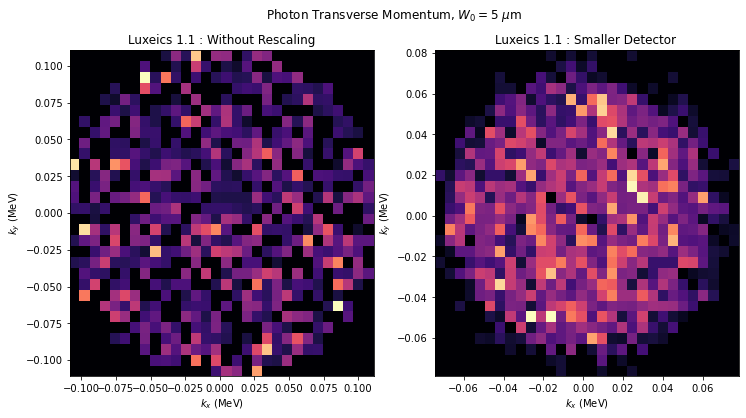

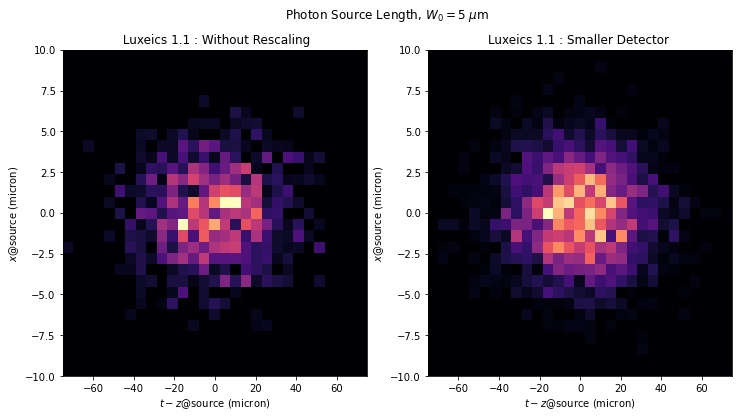

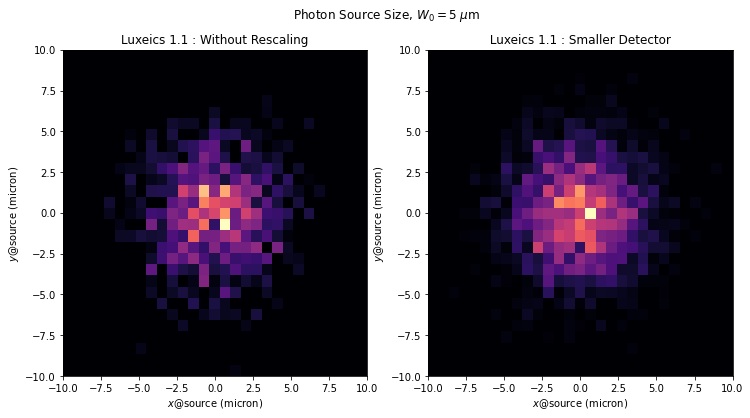

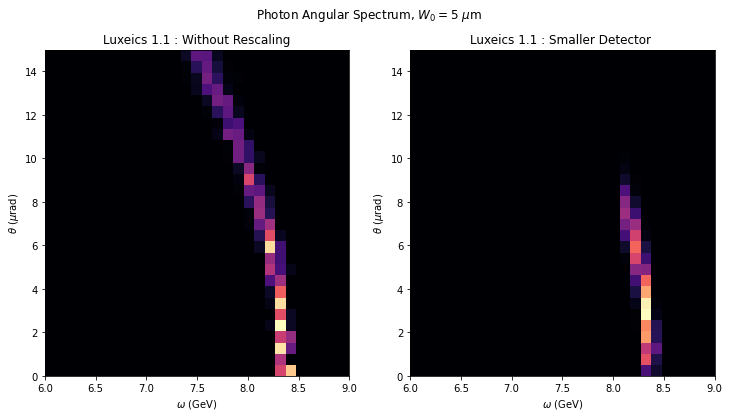

In [19]:
photon_transverse_momentum(input_filename1,input_filename2,w0)
photon_source_length(input_filename1,input_filename2,w0)
photon_source_size(input_filename1,input_filename2,w0)
photon_angular_spectrum(input_filename1,input_filename2,w0)


In [20]:
pdf.close()
